# **Sentimindle : Sentiment Analysis of Kindle Reviews on Amazon**

This research paper explores the sentiment analysis of Kindle Store reviews on Amazon. The aim of this study is to understand the sentiments expressed by customers in their reviews of Kindle Store products, and to identify common themes and patterns in these sentiments. The study utilizes a dataset of over 980k reviews of Kindle Store e-books, which were analyzed using natural language processing techniques and sentiment analysis algorithms. The results of the study suggest that the majority of Kindle Store reviews are positive in nature, with customers expressing satisfaction with the product's features, performance, and ease of use. However, the study also identifies some areas of concern for customers, such as pricing and quality issues. Overall, this study provides insights into the sentiments of customers towards Kindle Store products, which can be used by Amazon to improve their products and services.





## Steps that will be performed during the project: 

1. Data Collection
2. Data PReprocessing
3. Feature Selection and Extraction 
4. Sentiment Analysis
5. Model Evaluation 

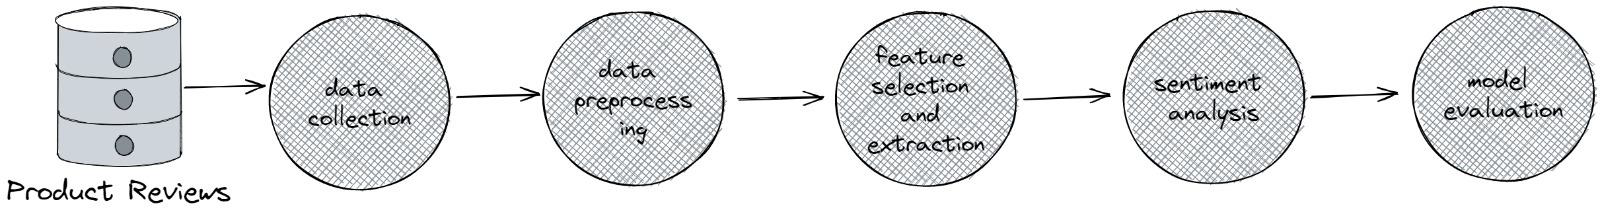

## About the Dataset: 

It is a dataset from May 1996 - July 2014 and contains a total of 983k entries. Each reviewer has at least 5 reviews and each product has at least 5 reviews in this dataset. The dataset contains columns such as helpfulness, overall rating, reviewText and summary of the review. 

**Columns:**
1. asin - ID of the product, like B000FA64PK
2. helpful - helpfulness rating of the review - example: 2/3.
3. overall - rating of the product.
4. reviewText - text of the review (heading).
5. reviewTime - time of the review (raw).
6. reviewerID - ID of the reviewer, like A3SPTOKDG7WBLN
7. reviewerName - name of the reviewer.
8. summary - summary of the review (description).
9. unixReviewTime - unix timestamp.

## **1. Data Collection**

### Importing all the necessary libraries: 

In [1]:
# dataframe and series 
import pandas as pd
import numpy as np

# sklearn imports for modeling part
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,balanced_accuracy_score
from sklearn.model_selection import train_test_split

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions

from sklearn.metrics import confusion_matrix

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

### Importing the dataset from google drive: 

In [11]:
df = pd.read_csv('/content/kindle_reviews.csv', low_memory = False)

In [12]:
df.head(100)

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1.399248e+09
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1.388966e+09
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1.396570e+09
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1.392768e+09
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1.395187e+09
...,...,...,...,...,...,...,...,...,...,...
95,95,B000GFK7L6,"[1, 1]",4,"I admit I am biased, as I already loved the co...","10 28, 2009",A3VBZDYGHF4NK8,"Movie Maker ""Rik""","An iconic paper, well done on Kindle, worth a ...",1.256688e+09
96,96,B000GFK7L6,"[0, 0]",4,I LOVE the NY TIMES and have been a at-home su...,"12 28, 2012",AJLPS4A9HGOQK,Patricia,The Times is Great but the Kindle app lacks a ...,1.356653e+09
97,97,B000GFK7L6,"[6, 6]",3,Below you will see my review for the old Kindl...,"04 5, 2010",A188PSUW6HG2AK,"R. Tilton ""rstde""",The New App is better,1.270426e+09
98,98,B000GFK7L6,"[0, 0]",4,I downloaded to read while on vacation! It's ...,"05 9, 2013",A18FT4SOVZ4CCW,SunbowSue,A Good Paper,1.368058e+09


In [16]:
df = df.drop('Unnamed: 0', axis = 1)

In [19]:
df.shape

(13151, 9)

Our dataset contains 9 columns and 13151 rows. 

In [20]:
df.isna().sum()

asin               0
helpful            0
overall            0
reviewText         0
reviewTime         0
reviewerID         0
reviewerName      36
summary            0
unixReviewTime     1
dtype: int64

The most important columns for us are 'overall' and 'reviewText'. 
The 'overall' column depicts the overall rating of the e-book and the 'reviewText' column depicts the heading the review. 

Since both these columns have no null values, we can move on. 

### Dropping unnecessary columns: 

1. reviewerName column is not required for sentiment analysis. Moreover, the reviewerID column is more helpful than the reviewerName column. Hence, we will drop this column. 

2. unixReviewTime column and reviewTime column are not required for sentiment analysis. Hence, we will drop these columns. 

In [24]:
df = df.drop('reviewerName', axis = 1)
df = df.drop('reviewTime', axis = 1)
df = df.drop('unixReviewTime', axis = 1)

In [25]:
df['overall'] = df['overall'].apply(np.int64) #converting from float to integer for creating new columns

The function below classifies the reviews as positive and negative, with 5 and 4 ratings as 2; 2 and 1 ratings as 1; and rating 3 as 0.

In [26]:
def calc_sentiment_with_neutral(overall):
    #encoding the sentiments of the ratings.
    if overall == 5 or overall == 4:
        return 2
    elif overall == 1 or overall==2 : 
        return 0
    else:
        return 1

In [27]:
df['sentiment'] = df['overall'].apply(calc_sentiment_with_neutral) #applying function

In [29]:
df.groupby(['sentiment','overall']).count()

asin  helpful  reviewText  reviewerID  summary
sentiment overall                                                
0         1         572      572         572         572      572
          2         765      765         765         765      765
1         3        1839     1839        1839        1839     1839
2         4        3912     3912        3912        3912     3912
          5        6063     6063        6063        6063     6063

From the chart above, we can check how the overall ratings have been classified and encoded.

In [30]:
df['sentiment'].value_counts() #number of new sentiments

2    9975
1    1839
0    1337
Name: sentiment, dtype: int64

## **2. Data Preprocessing**

Computers distinguish between 'Book' and 'book' as different words. Therefore, I will convert all letters in the text to lowercase and remove punctuation to improve the accuracy of my model.

In [31]:
df['reviewText']=df['reviewText'].str.lower() #to make all letters lowercase

In [32]:
import string
string.punctuation #to see punctuation library of string function

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
def remove_punctuation(text):
    #this function splits the words to letters, removes punctuation and then again joins them to form words.
    text_no_punc = "".join([c for c in text if c not in string.punctuation])
    return text_no_punc

In [34]:
#removing punctuations
df['review_clean'] = df['reviewText'].apply(lambda x: remove_punctuation(x))
df.head()

,asin,helpful,overall,reviewText,reviewerID,summary,sentiment,review_clean
0,B000F83SZQ,"[0, 0]",5,i enjoy vintage books and movies so i enjoyed ...,A1F6404F1VG29J,Nice vintage story,2,i enjoy vintage books and movies so i enjoyed ...
1,B000F83SZQ,"[2, 2]",4,this book is a reissue of an old one; the auth...,AN0N05A9LIJEQ,Different...,2,this book is a reissue of an old one the autho...
2,B000F83SZQ,"[2, 2]",4,this was a fairly interesting read. it had ol...,A795DMNCJILA6,Oldie,2,this was a fairly interesting read it had old...
3,B000F83SZQ,"[1, 1]",5,i'd never read any of the amy brewster mysteri...,A1FV0SX13TWVXQ,I really liked it.,2,id never read any of the amy brewster mysterie...
4,B000F83SZQ,"[0, 1]",4,"if you like period pieces - clothing, lingo, y...",A3SPTOKDG7WBLN,Period Mystery,2,if you like period pieces clothing lingo you ...


In the above table, we can compare the two columns, 'reviewText' and 'review_clean' and see that the punctuations have been removed from the reviews. 

To compare the most common words in positive, negative and neutral, I will divide dataframe as positive, negative and neutral based on sentiments.

In [35]:
df_pos = df.loc[df['sentiment']==2] #positive reviews dataframe
df_neg = df.loc[df['sentiment']==0] #negative reviews dataframe
df_notr = df.loc[df['sentiment']==1] #neutral reviews dataframe

stop_words = set(STOPWORDS) #setting stop words

## **3. Feature Selection and Extraction**

### **WordClouds:**
A word cloud is a visual representation of text data that displays the most frequent words in a given text or set of texts. In a word cloud, the size of each word is proportional to its frequency or importance in the text. Typically, the words are arranged randomly or in a way that visually looks appealing.

Word clouds are often used to summarize text data and provide a quick overview of the most significant terms. They are commonly used in areas such as marketing, social media analysis, and content analysis, where it is useful to quickly understand the main topics or themes present in a set of texts.

In [36]:
#assigning word cloud 
wordcloud = WordCloud(background_color='black', stopwords = stop_words,max_words = 500,
                    max_font_size = 100, random_state = 42, width=800, height=400)

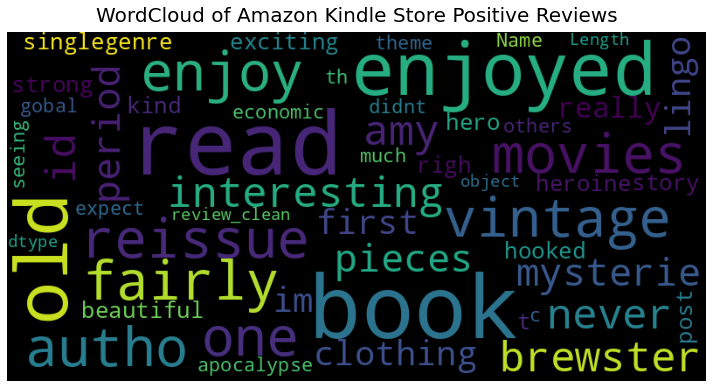

In [46]:
#to see the positive reviews wordcloud
wordcloud.generate(str(df_pos['review_clean']))
plt.figure(figsize=(10.0,6.0))
plt.imshow(wordcloud);
plt.title(f"WordCloud of Amazon Kindle Store Positive Reviews", fontdict={'size': 20, 'color': 'black', 'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout()  

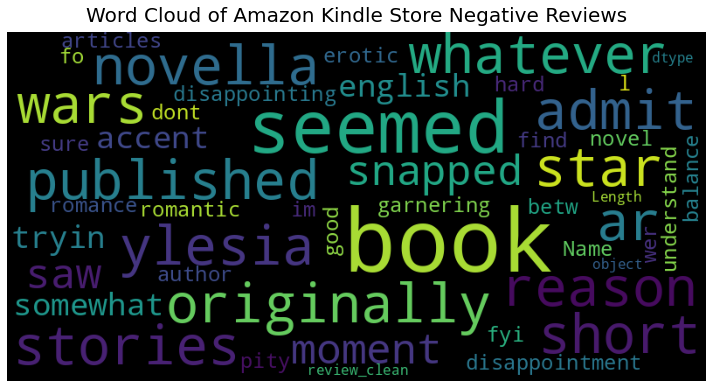

In [47]:
#to see negative wordcloud
wordcloud.generate(str(df_neg['review_clean']))
plt.figure(figsize=(10.0,6.0))
plt.imshow(wordcloud);
plt.title(f"Word Cloud of Amazon Kindle Store Negative Reviews", fontdict={'size': 20, 'color': 'black', 'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout()  

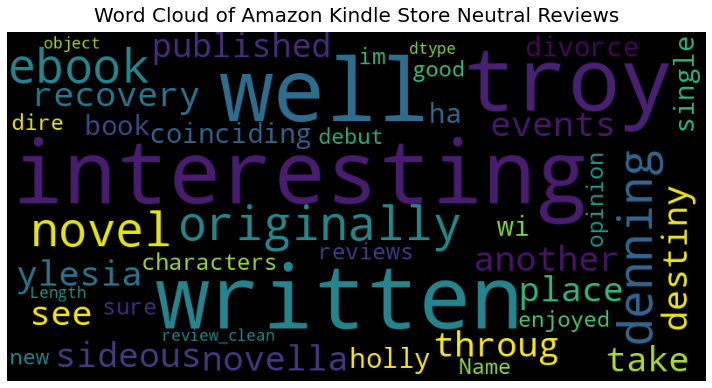

In [48]:
#to see neutral wordcloud
wordcloud.generate(str(df_notr['review_clean']))
plt.figure(figsize=(10.0,6.0))
plt.imshow(wordcloud);
plt.title(f"Word Cloud of Amazon Kindle Store Neutral Reviews", fontdict={'size': 20, 'color': 'black', 'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout() 

1. 'enjoyed', 'interesting', 'fairly', 'vintage' look bigger in the first wordcloud which means these are more characteristic words for positive reviews. 
2. 'book', 'snapped', 'whatever', 'somewhat' look characteristic words for the negative reviews. 
3. For neutral reviews, 'interesting', 'written', 'well', 'originally' look more characteristic than others.

## **4.Sentiment Analysis**

We plan to conduct sentiment analysis by utilizing a variety of machine learning and deep learning models. Specifically, we will employ logistic regression, Naive Bayes, SVM, and CNN.

### **a. logistic regression:**

**Splitting the test and train data:**

We want that our model is trained on balanced data, so we will take an equal number of training cases from all the label classes.

In [49]:
df['sentiment'].value_counts()

2    9975
1    1839
0    1337
Name: sentiment, dtype: int64

In [104]:
df_0 = df.loc[df['sentiment']==0]
df_1 = df.loc[df['sentiment']==1]
df_2 = df.loc[df['sentiment']==2]

In [105]:
frames = [df_0, df_1, df_2]
df_sampled = pd.concat(frames)

In [106]:
df_sampled['sentiment'].value_counts()

2    9975
1    1839
0    1337
Name: sentiment, dtype: int64

In [107]:
def logreg(df) :
    #This function splits data to train and test, then vectorizes reviews and calculates results from LogReg.

    #split train-test
    X_train, X_test, y_train, y_test = train_test_split(df['review_clean'], df['sentiment'], test_size=0.2, random_state=42)
        
    #define vectorizer and fit to data     
    word_vectorizer = TfidfVectorizer(sublinear_tf=True,strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}', stop_words='english', ngram_range=(1, 1),max_features=10000)

    word_vectorizer.fit(df['review_clean'])
    
    #train - test vectorized features
    train_word_features = word_vectorizer.transform(X_train)
    test_word_features = word_vectorizer.transform(X_test)
     
    #choosing and fitting classifier
    classifier = LogisticRegression(class_weight = "balanced", C=0.5, solver='sag')
    classifier.fit(train_word_features, y_train)
    
    #calculating results 
    y_pred_train = classifier.predict(train_word_features)
    y_pred = classifier.predict(test_word_features)
          
    print("Accuracy:")
    print(f"TRAIN: {accuracy_score(y_train, y_pred_train)}")
    print(f"TEST: {accuracy_score(y_test, y_pred)}")

    print("\nBalanced Accuracy:")
    print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred_train)}")
    print(f"TEST: {balanced_accuracy_score(y_test, y_pred)}")
    
    #plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm)
    plt.show()

Accuracy:
TRAIN: 0.8563688212927757
TEST: 0.7309007981755986

Balanced Accuracy:
TRAIN: 0.8789030478526912
TEST: 0.6373554712103632


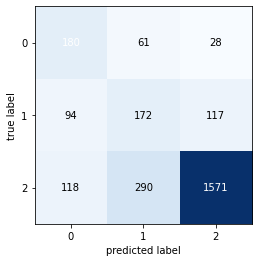

In [108]:

logreg(df_sampled)

We are experiencing overfitting of the data when we use the logistic regression model. However, since we want to experiment with deep learning models, we will move forward without fixing this issue. 

### **b. naive bayes classifer:**

In [109]:
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB

def naivebayes(df):
    # This function splits data to train and test, then vectorizes reviews and calculates results from Naive Bayes.

    # split train-test
    X_train, X_test, y_train, y_test = train_test_split(df['review_clean'], df['sentiment'], test_size=0.2, random_state=42)

    # define vectorizer and fit to data
    word_vectorizer = TfidfVectorizer(sublinear_tf=True, strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}', stop_words='english', ngram_range=(1, 1), max_features=10000)
    word_vectorizer.fit(df['review_clean'])

    # train-test vectorized features
    train_word_features = word_vectorizer.transform(X_train)
    test_word_features = word_vectorizer.transform(X_test)

    # choosing and fitting classifier
    classifier = MultinomialNB()
    classifier.fit(train_word_features, y_train)

    # calculating results
    y_pred_train = classifier.predict(train_word_features)
    y_pred = classifier.predict(test_word_features)

    # calculate F1 score
    print("F1 Score:")
    print(f"TRAIN: {f1_score(y_train, y_pred_train, average='weighted')}")
    print(f"TEST: {f1_score(y_test, y_pred, average='weighted')}")

    # plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm)
    plt.show()


F1 Score:
TRAIN: 0.6661928481025582
TEST: 0.6484369314235431


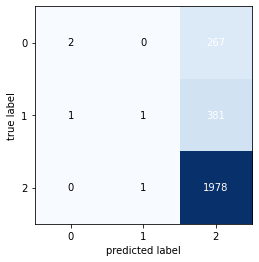

In [110]:
naivebayes(df_sampled)

Our Multinomial Naive Bayes Classifier is not giving high accuracy for the test data, and hence we move onto our next model. 

### **c. Supported Vector Machine:**

In [111]:
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC

def svm(df):
    # This function splits data to train and test, then vectorizes reviews and calculates results from SVM.

    # split train-test
    X_train, X_test, y_train, y_test = train_test_split(df['review_clean'], df['sentiment'], test_size=0.2, random_state=42)

    # define vectorizer and fit to data
    word_vectorizer = TfidfVectorizer(sublinear_tf=True, strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}', stop_words='english', ngram_range=(1, 1), max_features=10000)
    word_vectorizer.fit(df['review_clean'])

    # train-test vectorized features
    train_word_features = word_vectorizer.transform(X_train)
    test_word_features = word_vectorizer.transform(X_test)

    # choosing and fitting classifier
    classifier = LinearSVC(class_weight="balanced", C=0.5)
    classifier.fit(train_word_features, y_train)

    # calculating results
    y_pred_train = classifier.predict(train_word_features)
    y_pred = classifier.predict(test_word_features)

    # calculate F1 score
    print("F1 Score:")
    print(f"TRAIN: {f1_score(y_train, y_pred_train, average='weighted')}")
    print(f"TEST: {f1_score(y_test, y_pred, average='weighted')}")

    # plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm)
    plt.show()

F1 Score:
TRAIN: 0.9580171252496995
TEST: 0.7638421264583317


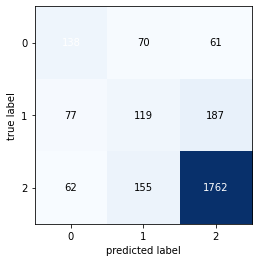

In [112]:
svm(df_sampled)

Our SVM classifer with a linear kernel is not giving higher accuracy for test data. Hence, we now move on to deep learning models for sentiment analysis. 

The first model that we will start with is the Keras Convulational Neural Network with 3 convolutional layers. 

### **d. Convolutional Neural Networks:**



In [113]:
import tensorflow
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [114]:
df_torch = df.head(100000)
df_torch= df_torch.loc[:, ['review_clean', 'sentiment']]
train_data, test_data = train_test_split(df_torch, test_size=0.2,random_state = 42)
train_data.to_csv('train.csv', index = False) 
test_data.to_csv('test.csv', index = False)

In [115]:
print(f'Number of training examples: {len(train_data)}')
print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 10520
Number of testing examples: 2631


In [116]:
df_cnn = pd.read_csv('train.csv')

In [117]:
df_cnn.head()

,review_clean,sentiment
0,i subscribe to both analog science fiction and...,1
1,i really liked the premise of this book this ...,1
2,i agree with some of the other reviewers of th...,1
3,i liked reading the story of the queen and dar...,2
4,i read this book a long time ago and i seem to...,2


In [118]:
df_cnn.dropna(inplace=True)

In [119]:
#Dividing the data into training and test sets so as to train our model on random data. 

train_data, test_data = train_test_split(df_cnn, test_size=0.2,random_state = 42)

I will divide the text and target to prepare data to model. I will do it for both train and test sets.

In [120]:
train_target = train_data.sentiment
train_texts = train_data.review_clean

test_target = test_data.sentiment
test_texts = test_data.review_clean

#### **Preparing data for Keras:**

In [121]:
def converting_texts(texts):
    collected_texts = []
    for text in texts:
        collected_texts.append(text)
    return collected_texts
        
train_texts = converting_texts(train_texts)
test_texts = converting_texts(test_texts)

I need to tokenize my text and padding sequences before modeling my data. I will use Keras proprocessing tools for this.

In [122]:
max_feat= 12000 #seting max features to define max number of tokenizer words

tokenizer = Tokenizer(num_words=max_feat)
tokenizer.fit_on_texts(train_texts)
# updates internal vocabulary based on a list of texts
# in the case where texts contains lists, we assume each entry of the lists to be a token
# required before using texts_to_sequences or texts_to_matrix

train_texts = tokenizer.texts_to_sequences(train_texts)
test_texts = tokenizer.texts_to_sequences(test_texts)
# transforms each text in texts to a sequence of integers
# Only top num_words-1 most frequent words will be taken into account 
# Only words known by the tokenizer will be taken into account

To use batches productively, I need to turn my sequences to same length. I prefer to set everything to maximum length of the longest sentence in train data.

In [123]:
max_len = max(len(train_ex) for train_ex in train_texts) #setting the max length

# using pad_sequence tool from Keras
# transforms a list of sequences to into a 2D Numpy array of shape 
# the maxlen argument for the length of the longest sequence in the list
train_texts = pad_sequences(train_texts, maxlen=max_len)
test_texts = pad_sequences(test_texts, maxlen=max_len)

#### **Building a Model:** 

In this simple model, convolutional neural nets were used with 64 embedding dimension. 3-convolutional layers used, first two have batch normalization and maximum pooling arguments. The last one has glabal maximum pooling. Results were passed to a dense layer and output for prediction.

Batch normalizations normalize and scale inputs or activations by reducing the amount what the hidden unit values shift around. Max Pool downsamples the input representation by taking the maximum value over the window defined by pool size.

In [124]:
def build_model():
    sequences = layers.Input(shape=(max_len,))
    embedded = layers.Embedding(max_feat, 64)(sequences)
    x = layers.Conv1D(64, 3, activation='relu')(embedded)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool1D(3)(x)
    x = layers.Conv1D(64, 5, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool1D(5)(x)
    x = layers.Conv1D(64, 5, activation='relu')(x)
    x = layers.GlobalMaxPool1D()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(100, activation='relu')(x)
    predictions = layers.Dense(1, activation='sigmoid')(x)
    model = models.Model(inputs=sequences, outputs=predictions)
    model.compile(
        optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['binary_accuracy']
    )
    return model
    
model = build_model()

In [125]:
model.fit(
    train_texts, 
    train_target, 
    batch_size=128,
    epochs=2,
    validation_data=(test_texts, test_target) )

Epoch 1/2
66/66 [==============================] - 85s 1s/step - loss: -1848.8096 - binary_accuracy: 0.1374 - val_loss: -148.5175 - val_binary_accuracy: 0.1397
Epoch 2/2
66/66 [==============================] - 84s 1s/step - loss: -16052.2334 - binary_accuracy: 0.1384 - val_loss: -1265.2328 - val_binary_accuracy: 0.1397
